In [1]:
%matplotlib inline

In [2]:
#-------------------------------------------------------------------------------------------------------------------------------
# By Alexandra Lee (July 2018) 
#
# Plot correlation between reconstructed vs observed gene expression
#-------------------------------------------------------------------------------------------------------------------------------
import os
import pandas as pd
import numpy as np
import seaborn as sns

randomState = 123
from numpy.random import seed
seed(randomState)

In [3]:
# load arguments
estimated_file = os.path.join(os.path.dirname(os.getcwd()), "output", "PA1673_full_old", "estimated_test_mid2_2layer_10latent.txt")
obsv_file = os.path.join(os.path.dirname(os.getcwd()), "data", "PA1673_full_old", "test_mid2_PA1673.txt")

# output
fig_file = os.path.join(os.path.dirname(os.getcwd()), "viz", "PA1673_full_old", "Latent_mid2.png")

In [4]:
# read in data
estimated_data = pd.read_table(estimated_file, header=0, sep='\t', index_col=0)
obsv_data = pd.read_table(obsv_file, header=0, sep='\t', index_col=0)

estimated_data.columns = obsv_data.columns  #Add gene ids to merge on later

#obsv_data
estimated_data

,PA0001,PA0002,PA0003,PA0004,PA0005,PA0006,PA0007,PA0008,PA0009,PA0010,...,PA5561,PA5562,PA5563,PA5564,PA5565,PA5566,PA5567,PA5568,PA5569,PA5570
120330-10978D_24_(Pae_G1a).CEL,0.582582,0.613748,0.336716,0.504033,0.392826,0.380780,0.528855,0.404997,0.340071,0.169191,...,0.305447,0.537699,0.533951,0.520409,0.636199,0.183437,0.479989,0.385545,0.489014,0.529879
120330-10978D_M1_(Pae_G1a).CEL,0.638687,0.672752,0.364511,0.545104,0.427337,0.400776,0.533558,0.415141,0.376059,0.160680,...,0.314609,0.546805,0.590113,0.541077,0.637388,0.155501,0.463584,0.392802,0.540282,0.567132
120330-10978D_M3_(Pae_G1a).CEL,0.632481,0.673937,0.363544,0.535927,0.427455,0.399120,0.541185,0.407730,0.389324,0.163384,...,0.340965,0.538638,0.610636,0.552072,0.647059,0.162893,0.463058,0.394577,0.554323,0.578269
GSM1027586_062508plcHR.CEL,0.626867,0.675495,0.353311,0.556112,0.420349,0.384065,0.531910,0.401000,0.419514,0.158736,...,0.361968,0.513897,0.623781,0.556063,0.654169,0.167054,0.470679,0.397062,0.551804,0.576062
GSM1027589_071008gbdR.CEL,0.671664,0.725778,0.371934,0.580732,0.429468,0.400511,0.558787,0.415007,0.438434,0.149811,...,0.362851,0.533097,0.673632,0.589000,0.670948,0.145197,0.465430,0.392497,0.594758,0.610278
GSM1191071_WT-pyr-2.CEL,0.656134,0.816971,0.425279,0.684872,0.436234,0.641576,0.508280,0.324517,0.419527,0.140594,...,0.515671,0.493664,0.784092,0.603036,0.583894,0.293613,0.410436,0.393917,0.757493,0.546296
GSM1267105_HZI1971_Pae_G1a.CEL,0.735756,0.767674,0.444331,0.674934,0.439797,0.400743,0.631648,0.552356,0.613463,0.190130,...,0.449213,0.559447,0.684511,0.682657,0.716144,0.129105,0.426886,0.453982,0.733842,0.716695
GSM1267106_HZI1972_Pae_G1a.CEL,0.738464,0.771205,0.446443,0.675290,0.442267,0.405545,0.630021,0.548688,0.609488,0.190823,...,0.450796,0.561274,0.689178,0.683777,0.713480,0.130877,0.433377,0.454594,0.730339,0.712521
GSM1267107_HZI1973_Pae_G1a.CEL,0.739564,0.772754,0.447645,0.680002,0.443470,0.404278,0.628578,0.550805,0.610440,0.191354,...,0.445923,0.560884,0.686454,0.681674,0.710356,0.129487,0.431044,0.453730,0.730177,0.711255
GSM1421002_EXdnr_control1.CEL,0.741906,0.681850,0.596962,0.731736,0.550071,0.477181,0.231966,0.726736,0.751161,0.243880,...,0.509386,0.654298,0.694561,0.776431,0.766671,0.257217,0.637227,0.737682,0.769244,0.729849


In [5]:
# Average gene expression across samples
estimated_data_mean = estimated_data.mean(axis=0)
obsv_data_mean = obsv_data.mean(axis=0)

estimated_data_mean_df = pd.DataFrame(estimated_data_mean, index=estimated_data_mean.index, columns=['estimated'])
obsv_data_mean_df = pd.DataFrame(obsv_data_mean, index=obsv_data_mean.index, columns=['observed'])

estimated_data_mean_df.head(5)
#obsv_data_mean_df.head(5)

,estimated
PA0001,0.621794
PA0002,0.629237
PA0003,0.429692
PA0004,0.608270
PA0005,0.445991


In [6]:
# Join 
X = pd.merge(estimated_data_mean_df, obsv_data_mean_df, left_index=True, right_index=True)
X.head(5)

,estimated,observed
PA0001,0.621794,0.655853
PA0002,0.629237,0.680304
PA0003,0.429692,0.472097
PA0004,0.608270,0.688112
PA0005,0.445991,0.437766


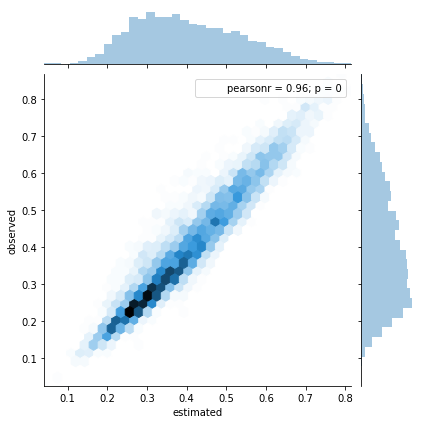

In [7]:
# Plot
fg=sns.jointplot(x='estimated', y='observed', data=X, kind='hex');
fg.savefig(fig_file)

In [8]:
# Calculate error: RMSE of estimated data and observed data per sample

# Note: estiamted and observed samples are not matched, so how do we compare them?
#rmse = np.ndarray(shape=(1, estimated_data.shape[1]))
#i = 0
#for col in estimated_data.columns:
#    rmse[0,i] = ((estimated_data[col] - obsv_data[col]) ** 2).mean() ** .5
#    i+=1
#rmse